Linear Regression MSE: 5.9233
Lasso MSE: 5.9608
Ridge MSE: 5.9277


ValueError: num must be an integer with 1 <= num <= 4, not 5

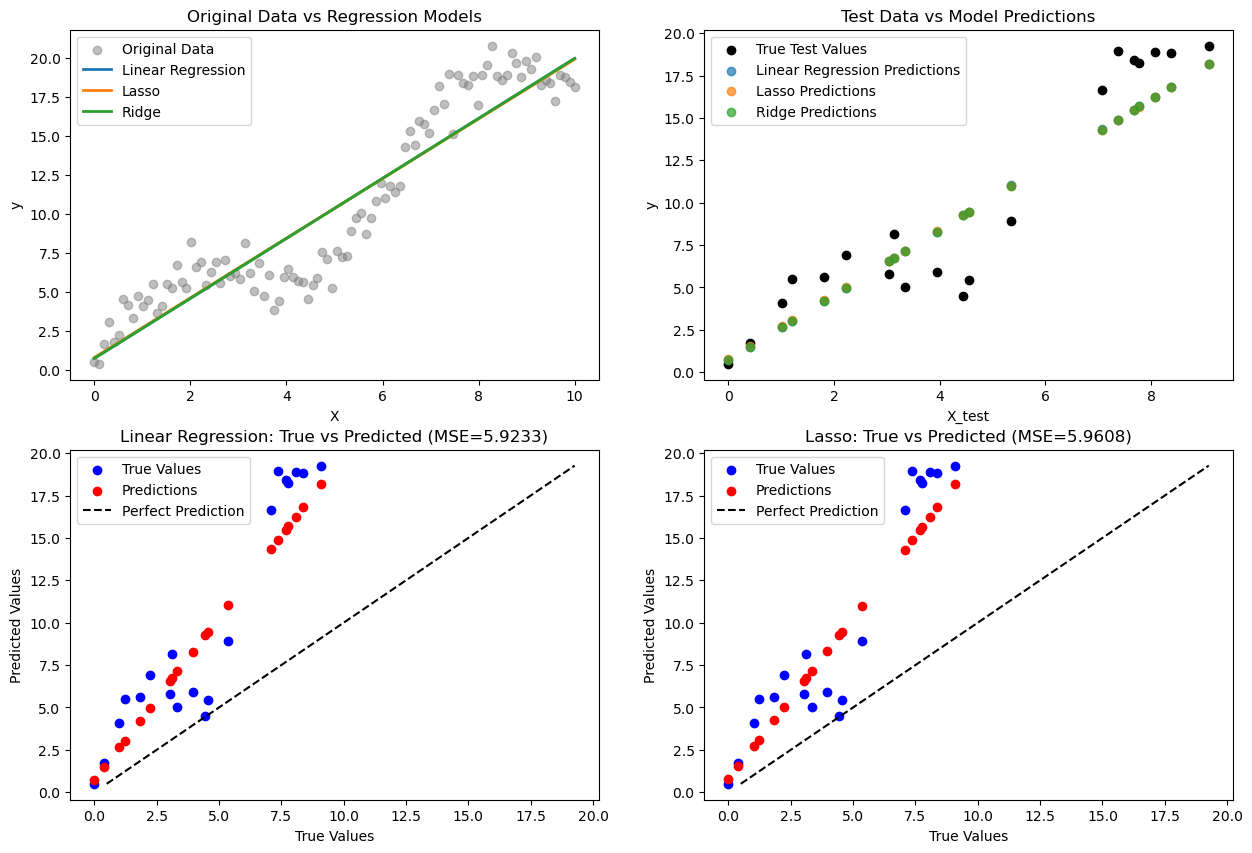

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + np.sin(X.squeeze()) * 3 + np.random.normal(0, 1, 100)

# 2. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "Ridge": Ridge(alpha=0.5)
}

# 4. Train models, make predictions, and calculate MSE
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {"model": model, "y_pred": y_pred, "mse": mse}
    
    # Print MSE
    print(f"{name} MSE: {mse:.4f}")

# 5. Plot results
plt.figure(figsize=(15, 10))

# Plot 1: Original data and regression lines
plt.subplot(2, 2, 1)
plt.scatter(X, y, alpha=0.5, label='Original Data', color='gray')
x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
for name, result in results.items():
    plt.plot(x_plot, result["model"].predict(x_plot), linewidth=2, label=name)
plt.title('Original Data vs Regression Models')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Plot 2: Test data vs predictions
plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, label='True Test Values', color='black', marker='o')
for name, result in results.items():
    plt.scatter(X_test, result["y_pred"], alpha=0.7, label=f'{name} Predictions')
plt.title('Test Data vs Model Predictions')
plt.xlabel('X_test')
plt.ylabel('y')
plt.legend()

# Individual model comparison plots
for i, (name, result) in enumerate(results.items(), 3):
    plt.subplot(2, 2, i)
    plt.scatter(X_test, y_test, color='blue', label='True Values')
    plt.scatter(X_test, result["y_pred"], color='red', label='Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
             'k--', label='Perfect Prediction')
    plt.title(f'{name}: True vs Predicted (MSE={result["mse"]:.4f})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()

plt.tight_layout()
plt.show()